In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def heatmap(sim_df, kg_df, genes):
    data_upper_df = sim_df.loc[genes, genes]
    data_lower_df = kg_df.loc[genes, genes]
    identity_matrix_df = pd.DataFrame(
        np.identity(len(genes)), index=genes, columns=genes
    )

    # Create the clustermap
    g = sns.clustermap(
        data_upper_df,
        cmap="RdBu",
        row_cluster=False,
        col_cluster=True,
        cbar_pos=(0.03, 0.8, 0.03, 0.2),
        vmin=0,
        vmax=1,
    )

    # Mask the lower triangle
    mask = np.tril(np.ones_like(data_upper_df, dtype=bool))

    # Clustered genes order
    clustered_genes = [genes[i] for i in g.dendrogram_col.reordered_ind]

    # Apply the mask to the clustered heatmap
    sns.heatmap(
        data_upper_df.loc[clustered_genes, clustered_genes],
        mask=mask,
        cmap="RdBu",
        cbar=False,
        ax=g.ax_heatmap,
        annot=True,
    )

    # Overlay the second heatmap on the lower triangle
    sns.heatmap(
        data_lower_df.loc[clustered_genes, clustered_genes],
        mask=~mask,
        cmap="Greys",
        cbar=False,
        ax=g.ax_heatmap,
        annot=True,
        vmin=0,
        vmax=1,
    )

    cbar_ax = g.figure.add_axes([0.13, 0.8, 0.03, 0.2])
    cbar = g.figure.colorbar(g.ax_heatmap.collections[2], cax=cbar_ax)
    cbar.outline.set_linewidth(0)

    # Mask the diagonal
    mask_diagonal = np.eye(data_upper_df.shape[0], dtype=bool)
    sns.heatmap(
        identity_matrix_df.loc[clustered_genes, clustered_genes],
        mask=~mask_diagonal,
        cmap="Greys_r",
        cbar=False,
        ax=g.ax_heatmap,
        annot=True,
    )

    # Create colorbar label
    g.cax.set_ylabel("ORF similarity percentile", rotation=90, labelpad=-60)
    cbar_ax.set_ylabel("Knowledge Graph", rotation=90, labelpad=-60)

    return plt

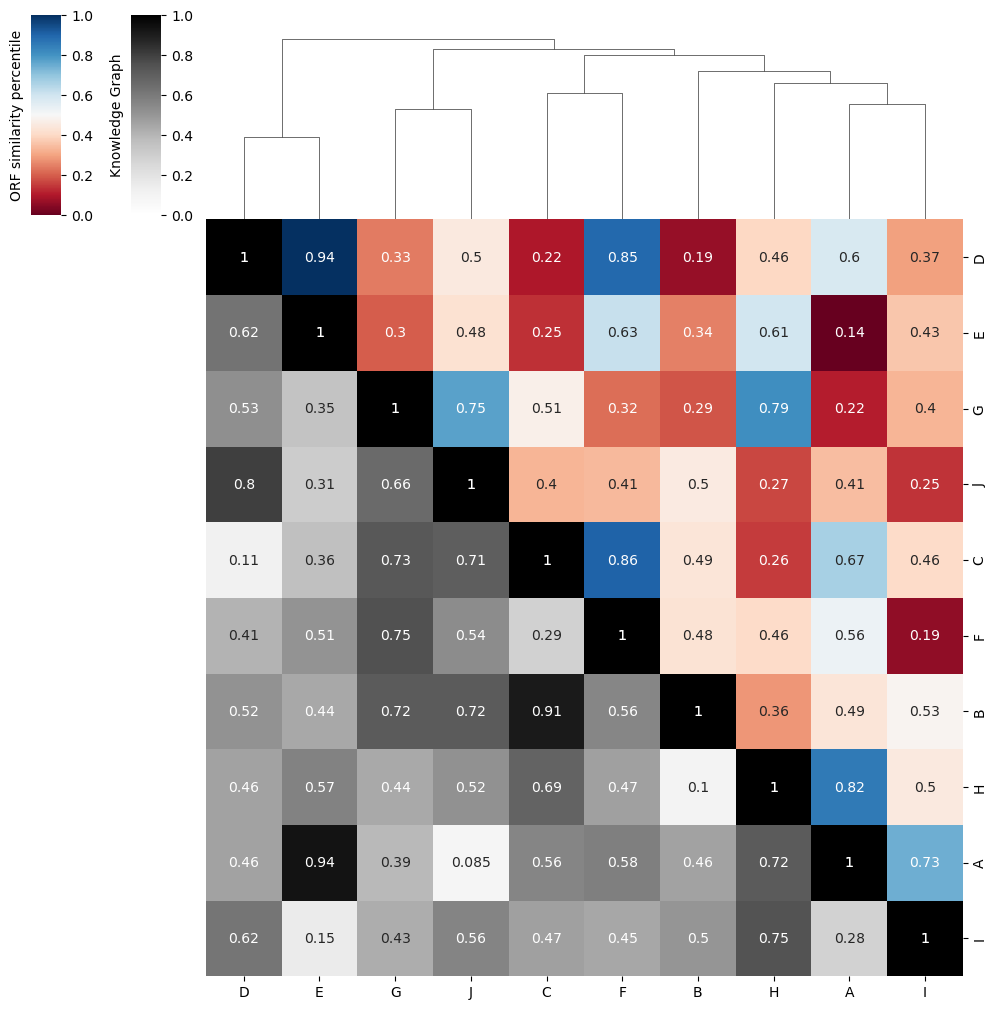

In [3]:
# Sample data (replace with your actual data)
np.random.seed(42)
data_upper = np.random.rand(10, 10)
data_upper = data_upper + data_upper.T
data_upper = data_upper / 2
data_lower = np.random.rand(10, 10)
data_lower = data_lower + data_lower.T
data_lower = data_lower / 2

genes = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J"]

for i in range(10):
    data_upper[i, i] = 1
    data_lower[i, i] = 1

data_upper_df = pd.DataFrame(data_upper, index=genes, columns=genes)
data_lower_df = pd.DataFrame(data_lower, index=genes, columns=genes)

identity_matrix_df = pd.DataFrame(np.identity(10), index=genes, columns=genes)

figure = heatmap(data_upper_df, data_lower_df, genes)
figure.show()
